In [1]:
suppressMessages(library(anndataR))
suppressMessages(library(Seurat))

In [2]:
in_dir <- '../../results/06_endo/04_merge_clusters'
out_dir <- '../../results/06_endo/06_find_markers'

if(!dir.exists(out_dir)){
    dir.create(out_dir, recursive = TRUE)

}

In [3]:
adata = anndataR::read_h5ad(glue::glue("{in_dir}/endothelial.h5ad"))

In [4]:
adata

AnnData object with n_obs × n_vars = 5726 × 15275
    obs: 'patient_id', 'condition', 'cell_type', 'data', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'sub_clusters', 'sub_clusters_v2'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [5]:
# convert data to Seurat object
counts <- t(as.matrix(adata$layers$counts))
colnames(counts) <- adata$obs_names
rownames(counts) <- adata$var_names

metadata <- as.data.frame(adata$obs)
obj <- CreateSeuratObject(counts = counts, assay = "RNA")
obj <- AddMetaData(obj, metadata)

# add PCA and UMAP
df_pca <- as.matrix(adata$obsm$X_pca_harmony)
rownames(df_pca) <- adata$obs_names

df_umap <- as.matrix(adata$obsm$X_umap)
rownames(df_umap) <- adata$obs_names

obj[["PCA"]] <- CreateDimReducObject(embeddings = df_pca, 
                                             key = "PCA_", 
                                             assay = DefaultAssay(obj))

obj[["UMAP"]] <- CreateDimReducObject(embeddings = df_umap, 
                                             key = "UMAP_", 
                                             assay = DefaultAssay(obj))

Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”
Warning message:
“No columnames present in cell embeddings, setting to 'PCA_1:50'”
Warning message:
“No columnames present in cell embeddings, setting to 'UMAP_1:2'”


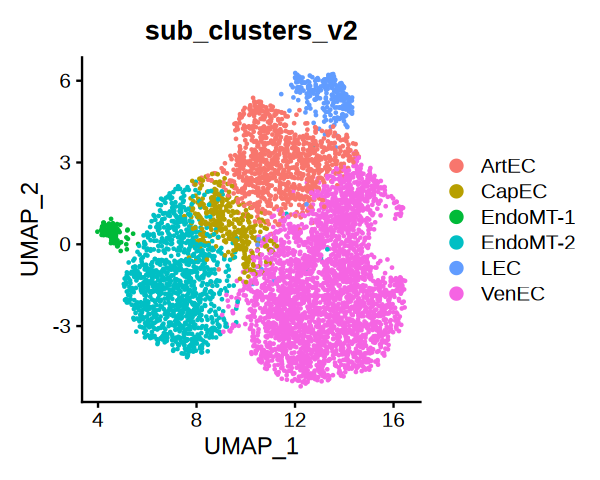

In [8]:
options(repr.plot.height = 4, repr.plot.width = 5)

DimPlot(obj, group.by = "sub_clusters_v2")

In [9]:
obj <- NormalizeData(obj)

Normalizing layer: counts



In [10]:
Idents(obj) <- "sub_clusters_v2"

In [11]:
obj

An object of class Seurat 
15275 features across 5726 samples within 1 assay 
Active assay: RNA (15275 features, 0 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: PCA, UMAP

In [21]:
markers <- FindAllMarkers(obj, assay = "RNA", min.pct = 0.01, only.pos = TRUE)

Calculating cluster ArtEC

Calculating cluster CapEC

Calculating cluster EndoMT-1

Calculating cluster EndoMT-2

Calculating cluster LEC

Calculating cluster VenEC



In [22]:
markers <- subset(markers, p_val_adj < 0.05)

In [25]:
write.csv(markers, glue::glue("{out_dir}/markers_endo.csv"), row.names=FALSE)

In [26]:
head(markers)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
A2M,2.491620e-71,1.1796783,0.831,0.800,3.805950e-67,ArtEC,A2M
GNG11,2.516444e-69,0.7866381,0.898,0.907,3.843869e-65,ArtEC,GNG11
IGFBP3,1.819892e-60,3.1633600,0.303,0.118,2.779886e-56,ArtEC,IGFBP3
TXNIP,9.207373e-60,1.1588847,0.801,0.720,1.406426e-55,ArtEC,TXNIP
CXCL12,7.714974e-58,2.3727768,0.498,0.328,1.178462e-53,ArtEC,CXCL12
SEMA3G,1.134362e-49,3.2619941,0.196,0.060,1.732738e-45,ArtEC,SEMA3G
